{ 00000:14 00001:8 00010:4 00011:7 00100:8 00101:13 00110:10 00111:4 01000:5 01001:7 01010:6 01011:5 01100:4 01101:15 01110:11 01111:5 10000:12 10001:14 10010:5 10011:9 10100:8 10101:9 10110:730 10111:11 11000:5 11001:10 11010:10 11011:5 11100:10 11101:8 11110:15 11111:13 }



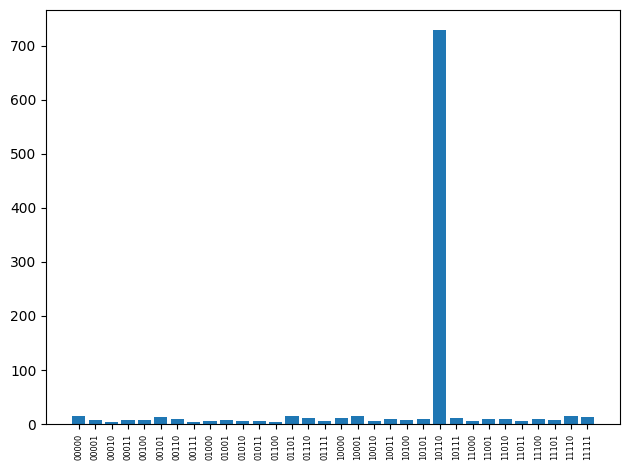

In [2]:
import cudaq
import matplotlib.pyplot as plt


@cudaq.kernel
def reflect(qubits: cudaq.qview):
    ctrls = qubits.front(qubits.size() - 1)
    last = qubits.back()
    cudaq.compute_action(lambda: (h(qubits), x(qubits)),
                          lambda: z.ctrl(ctrls, last))

@cudaq.kernel
def oracle(marked_states: list[list[int]], qubits: cudaq.qview):
    ctrls = qubits.front(qubits.size() - 1)
    last = qubits.back()
    for state in marked_states:
        for i, bit in enumerate(state):
            if bit == 0:
                x(qubits[i])
        z.ctrl(ctrls, last)
        for i, bit in enumerate(state):
            if bit == 0:
                x(qubits[i])

@cudaq.kernel
def grover():

    marked_states = [[1,0,1,1,0]]

    num_qubits = len(marked_states[0])
    iterations = 2**num_qubits // len(marked_states)
    q = cudaq.qvector(len(marked_states[0]))

    h(q)
    for i in range(iterations):
        oracle(marked_states, q)
        reflect(q)

    mz(q)

counts = cudaq.sample(grover)
print(counts)

sorted_counts = dict(sorted(counts.items()))
bitstrings = list(sorted_counts.keys())
frequencies = list(sorted_counts.values())
plt.bar(range(len(bitstrings)), frequencies)
plt.xticks(range(len(bitstrings)), bitstrings, rotation='vertical', fontsize=6)
plt.tight_layout()
plt.show()